# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### NN Training for Exercise 11.2 </span>

Models are saved in the folder /models_11.2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

In [2]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

In [3]:
# target parameters of f(x) = a + b*x + c*x^2 + d*x^3
a = 4 
b = -3
c = -2
d = 3

def f(x):
    return a + b*x + c*x**2 + d*x**3

In [4]:
# generate training inputs
np.random.seed(0)

n_valid = 200
n_train = n_valid*10
sigma = 0.3 # noise standard deviation
n_epochs = 100

x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target =  f(x_valid) # ideal (target) function

y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

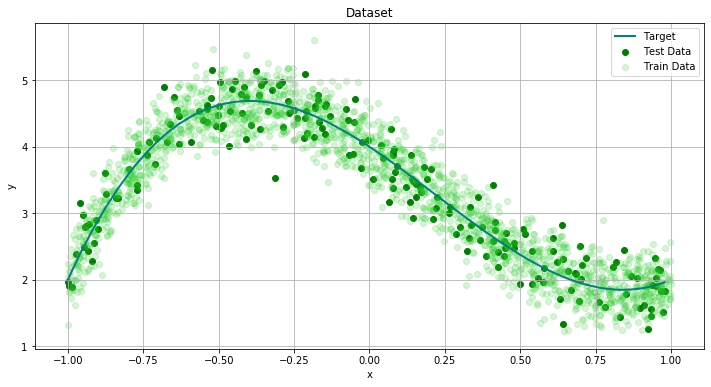

In [5]:
# plot training and target dataset
plt.figure(figsize=(12, 6))
plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.scatter(x_valid, y_valid, color='green', label='Test Data')
plt.scatter(x_train, y_train, color='limegreen', alpha=0.2, label='Train Data')
plt.title("Dataset")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

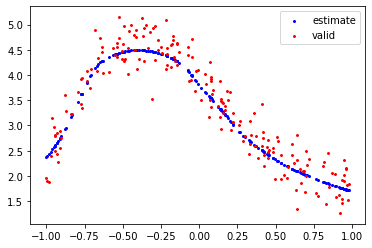

7/7 [==============================] - 0s 28ms/step - loss: 0.1185 - mse: 0.1185 - val_loss: 0.1079 - val_mse: 0.1079
INFO:tensorflow:Assets written to: models_1.2/HL_5_N_100\assets


In [15]:
"""
#n_N = [1, 5, 10, 20, 50, 100]
#n_N = [10, 50, 100]
#n_HL = [3, 5]

L=1 #HL
I=6 #N

for i in range(I):
    filename='models_11.2/N_'+str(n_N[i])

    model = tf.keras.Sequential()
    model.add(Dense(n_N[i], input_shape=(1,), activation='selu'))
    
    for l in range(L):
        model.add(Dense(n_N[i], activation='selu'))
        
    model.add(Dense(1))

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    
    plot_estimate = PlotCurrentEstimate(x_valid, y_valid)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, mode='auto')

    history= model.fit(x_valid, y_valid, batch_size=32, epochs=n_epochs,
              validation_data=(x_valid, y_valid),
              callbacks=[ plot_estimate, earlystop], verbose=1)

    model.save(filename)
    
"""

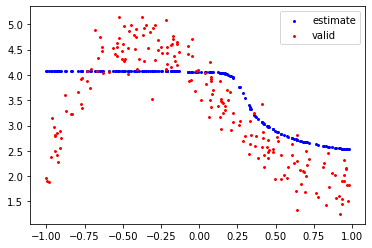

7/7 [==============================] - 0s 64ms/step - loss: 0.3959 - mse: 0.3959 - val_loss: 0.5267 - val_mse: 0.5267
INFO:tensorflow:Assets written to: models_1.2/HL_15\assets


In [116]:
"""
n_HL = [1, 2, 3, 5, 10, 15]

I=6 #HL

for i in range(I):
    filename='models_11.2/HL_'+str(n_HL[i])
    
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,), activation='selu'))

    for l in range(int(n_HL[i])):
        model.add(Dense(1, activation='selu'))
    
    model.add(Dense(1))

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    plot_estimate = PlotCurrentEstimate(x_valid, y_valid)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, mode='auto')

    history= model.fit(x_valid, y_valid, batch_size=32, epochs=n_epochs,
              validation_data=(x_valid, y_valid),
              callbacks=[ plot_estimate, earlystop], verbose=1)

    model.save(filename)

"""

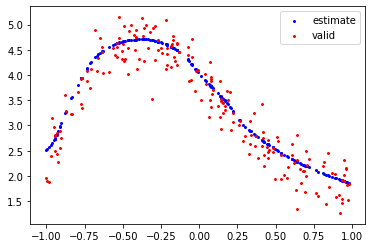

7/7 [==============================] - 0s 35ms/step - loss: 0.1053 - mse: 0.1053 - val_loss: 0.1064 - val_mse: 0.1064
INFO:tensorflow:Assets written to: models_1.2/HL_5_N_10_act_selu\assets


In [154]:
"""
activ=['sigmoid', 'tanh', 'elu', 'relu', 'selu']
#n_N = [5, 10]

L=5 #HL
I=5

for i in range(I):
    filename='models_11.2/HL_5_N_10_act_'+activ[i]

    model = tf.keras.Sequential()
    model.add(Dense(10, input_shape=(1,), activation=activ[i]))
    
    for l in range(L):
        model.add(Dense(10, activation=activ[i]))
    
    model.add(Dense(1))

    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    plot_estimate = PlotCurrentEstimate(x_valid, y_valid)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, mode='auto')

    history= model.fit(x_valid, y_valid, batch_size=32, epochs=n_epochs,
              validation_data=(x_valid, y_valid),
              callbacks=[ plot_estimate, earlystop], verbose=1)

    model.save(filename)

"""

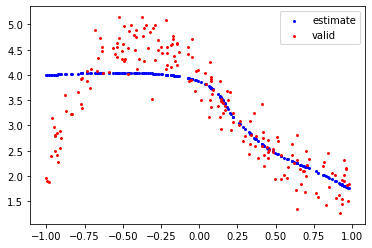

7/7 [==============================] - 0s 32ms/step - loss: 0.3572 - mse: 0.3572 - val_loss: 0.3563 - val_mse: 0.3563
INFO:tensorflow:Assets written to: models_1.2/HL_5_N_5_opt_Adam\assets


In [211]:
"""
opt=['sgd', 'RMSprop', 'Adagrad', 'Adam']
#n_N = [5, 10]

L=5 #HL
I=4
for i in range(I):
    filename='models_11.2/HL_5_N_5_opt_'+opt[i]

    model = tf.keras.Sequential()
    model.add(Dense(5, input_shape=(1,), activation='selu'))
    
    for l in range(L):
        model.add(Dense(5, activation='selu'))
        
    model.add(Dense(1))

    model.compile(optimizer=opt[i], loss='mse', metrics=['mse'])

    plot_estimate = PlotCurrentEstimate(x_valid, y_valid)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, mode='auto')

    history= model.fit(x_valid, y_valid, batch_size=32, epochs=n_epochs,
              validation_data=(x_valid, y_valid),
              callbacks=[ plot_estimate, earlystop], verbose=1)

    model.save(filename)
    
"""

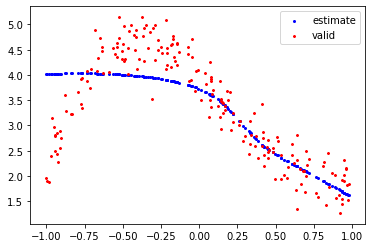

7/7 [==============================] - 0s 31ms/step - loss: -0.8124 - mse: 0.3857 - val_loss: -0.8122 - val_mse: 0.3877
INFO:tensorflow:Assets written to: models_1.2/HL_5_N_5_lo_poisson\assets


In [222]:
"""
lo=['mse','mae','msle', 'logcosh', 'poisson']
#n_N = [5, 10]

L=5 #HL
I=5
for i in range(I):
    filename='models_11.2/HL_5_N_5_lo_'+lo[i]

    model = tf.keras.Sequential()
    model.add(Dense(5, input_shape=(1,), activation='selu'))
    
    for l in range(L):
        model.add(Dense(5, activation='selu'))
    
    model.add(Dense(1))

    model.compile(optimizer='sgd', loss=lo[i], metrics=['mse'])

    plot_estimate = PlotCurrentEstimate(x_valid, y_valid)
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, mode='auto')

    history= model.fit(x_valid, y_valid, batch_size=32, epochs=n_epochs,
              validation_data=(x_valid, y_valid),
              callbacks=[ plot_estimate, earlystop], verbose=1)

    model.save(filename)
    
"""

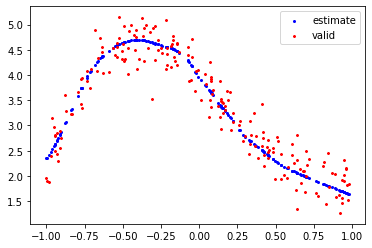

7/7 [==============================] - 0s 31ms/step - loss: 0.0477 - mse: 0.1000 - val_loss: 0.0472 - val_mse: 0.0989
INFO:tensorflow:Assets written to: models_1.2/HL_5_N_50_act_selu_opt_Adam_lo_logcosh\assets


In [233]:
"""
activ=['tanh','selu']
opt=['sgd', 'Adam']
lo=['mse','logcosh']
n_N = 50
n_HL = 5

I=2

for i in range(I):
    for j in range(I):
        for k in range(I):
            filename='models_11.2/HL_5_N_50_act_'+activ[i]+'_opt_'+opt[j]+'_lo_'+lo[k]

            model = tf.keras.Sequential()
            model.add(Dense(n_N, input_shape=(1,), activation=activ[i]))
    
            for l in range(n_HL):
                model.add(Dense(n_N, activation=activ[i]))
    
            model.add(Dense(1))

            model.compile(optimizer=opt[j], loss=lo[k], metrics=['mse'])

            plot_estimate = PlotCurrentEstimate(x_valid, y_valid)
            earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, mode='auto')

            history= model.fit(x_valid, y_valid, batch_size=32, epochs=n_epochs,
              validation_data=(x_valid, y_valid),
              callbacks=[ plot_estimate, earlystop], verbose=1)

            model.save(filename)
"""

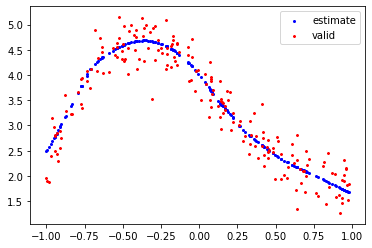

7/7 [==============================] - 0s 29ms/step - loss: 0.0518 - mse: 0.1083 - val_loss: 0.0467 - val_mse: 0.0979
INFO:tensorflow:Assets written to: models_1.2/HL_3_N_50_act_selu_opt_Adam_lo_logcosh\assets


In [11]:
activ=['tanh','selu']
opt=['sgd', 'Adam']
lo=['mse','logcosh']
n_N = 50
n_HL = 3

I=2

for i in range(I):
    for j in range(I):
        for k in range(I):
            filename='models_11.2/HL_3_N_50_act_'+activ[i]+'_opt_'+opt[j]+'_lo_'+lo[k]

            model = tf.keras.Sequential()
            model.add(Dense(n_N, input_shape=(1,), activation=activ[i]))
    
            for l in range(n_HL):
                model.add(Dense(n_N, activation=activ[i]))
    
            model.add(Dense(1))

            model.compile(optimizer=opt[j], loss=lo[k], metrics=['mse'])

            plot_estimate = PlotCurrentEstimate(x_valid, y_valid)
            earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, mode='auto')

            history= model.fit(x_valid, y_valid, batch_size=32, epochs=n_epochs,
              validation_data=(x_valid, y_valid),
              callbacks=[ plot_estimate, earlystop], verbose=1)

            model.save(filename)